In [1]:
import numpy as np
import pandas as pd

In [2]:
songs = pd.read_csv('training.csv')
related_songs = pd.read_csv('test.csv')

In [3]:
def normalize_df(df):
    columns = list(df.columns.values)
    columns.pop(0)
    columns.pop(0)
    for col in columns:
        c_min = np.min(df[col])
        c_max = np.max(df[col])
        df[col] = (df[col] - c_min) / (c_max - c_min)

In [4]:
normalize_df(songs)
normalize_df(related_songs)

In [5]:
songs.head()

,artist_id,song_id,danceability,duration_ms,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo
0,6DIS6PRrLS3wbnZsf7vYic,3e0yTP5trHBBVvV32jwXqF,0.317666,0.970469,0.754417,0.909091,0.575455,0.002646,0.000000,0.245628,0.292963,0.492139
1,53XhwfbYqKCa1cC15pYq2q,0yt31hMKZMiyIEfiBiLD2N,0.646677,0.268915,0.454064,0.090909,0.710368,0.063756,0.000000,0.117613,0.548344,0.452656
2,0epOFNiUfyON9EYx7Tpr6V,4fPBB44eDH71YohayI4eKV,0.573744,0.198707,0.867491,1.000000,0.927380,0.037078,1.000000,0.103898,0.993309,0.340874
3,4gzpq5DPGxSnKTe4SA8HAU,1yqMgZNrevsWMLWfO2PRp5,0.249595,0.759371,0.567138,0.909091,0.533305,0.033022,0.002787,0.348497,0.019070,0.476262
4,4PCSnq8Q3hxOTn3ro4cl0M,4zXa17K83Pp6N2yXdVc2sv,0.478120,0.142835,0.805654,0.363636,0.484977,0.388423,0.000000,0.572523,0.805955,0.137071


In [6]:
related_songs.head()

,uri,track_href,danceability,duration_ms,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo
0,spotify:track:6qtJjCxvfv2GV10ZIEtUUo,https://api.spotify.com/v1/tracks/6qtJjCxvfv2G...,0.589958,0.347552,0.697323,0.272727,0.808367,0.039839,0.001027,0.087964,0.348223,0.629747
1,spotify:track:2fu85nhD3NadF1IIKYc3L0,https://api.spotify.com/v1/tracks/2fu85nhD3Nad...,0.555439,0.247985,0.878729,0.000000,0.911050,0.002505,0.080163,0.051655,0.537056,0.787386
2,spotify:track:0iQ77tSa7ncj7zBPtVx6cU,https://api.spotify.com/v1/tracks/0iQ77tSa7ncj...,0.608787,0.349635,0.822603,0.000000,0.881073,0.007586,0.000002,0.820461,0.475127,0.463257
3,spotify:track:5OzQuvOzXq1wzZ5NsbjUYV,https://api.spotify.com/v1/tracks/5OzQuvOzXq1w...,0.654812,0.408103,0.668258,0.000000,0.829111,0.010765,0.000000,0.078335,0.180711,0.527999
4,spotify:track:51AxhwqcWWR0j4dLwmXBBr,https://api.spotify.com/v1/tracks/51AxhwqcWWR0...,0.687238,0.342625,0.949888,0.181818,0.872158,0.000751,0.009502,0.173521,0.655838,0.592672


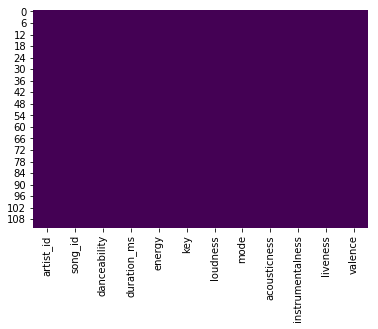

In [49]:
import seaborn as sns
sns.heatmap(songs.isnull(), cbar=False, cmap='viridis')

In [7]:
def find_dist(row1, row2):
    row1 = list(row1)
    row2 = list(row2)
    for _ in range(3):
        row1.pop(0)
        row2.pop(0)
    row1 = np.array(row1)
    row2 = np.array(row2)
    return np.sum((row1 - row2) ** 2) ** .5

In [8]:
def find_closest_k(row, df, k):
    distances = list(df.apply(lambda df_row: find_dist(row, df_row), axis=1))
    distances.sort()
    return sum(distances[:k])

In [9]:
def find_top_10(test_df, train_df, k):
    test_df['closeness'] = test_df.apply(lambda row: find_closest_k(row, train_df, k), axis=1)
    return test_df.sort_values('closeness', inplace=True)

In [10]:
find_top_10(related_songs, songs, 11)

In [11]:
related_songs.reset_index(drop=True, inplace=True)

uri                              spotify:track:2WtcIzsQWb5PDO3AaGcXMK
track_href          https://api.spotify.com/v1/tracks/2WtcIzsQWb5P...
danceability                                                 0.381593
duration_ms                                                  0.065374
energy                                                       0.843546
key                                                          0.727273
loudness                                                     0.860073
mode                                                                1
acousticness                                               0.00855422
instrumentalness                                                    0
liveness                                                         0.11
valence                                                       0.60682
closeness                                                     3.66629
Name: 5, dtype: object

In [13]:
related_songs.head(15)

,uri,track_href,danceability,duration_ms,energy,key,loudness,acousticness,instrumentalness,liveness,valence,tempo,closeness
0,spotify:track:15vdIA9MH8GORELzYKOXY6,https://api.spotify.com/v1/tracks/15vdIA9MH8GO...,0.592050,0.314297,0.737413,0.818182,0.819273,0.077465,0.000005,0.095486,0.591878,0.423955,3.400972
1,spotify:track:52cyCwlHkz5ic3k3dEgwpX,https://api.spotify.com/v1/tracks/52cyCwlHkz5i...,0.541841,0.302994,0.825610,0.181818,0.721812,0.025855,0.000012,0.097492,0.494416,0.573771,3.431434
2,spotify:track:3oG20wqkXkuN4Z2XbUNYlx,https://api.spotify.com/v1/tracks/3oG20wqkXkuN...,0.489540,0.279537,0.771489,0.818182,0.759867,0.017404,0.000004,0.101304,0.660914,0.591380,3.437348
3,spotify:track:7aWteDB2WfxgAJu3uqWIUn,https://api.spotify.com/v1/tracks/7aWteDB2Wfxg...,0.461297,0.280244,0.814585,0.818182,0.792354,0.015996,0.000006,0.097994,0.621320,0.591338,3.455749
4,spotify:track:3xmSH2UrjglL5aaSxj5hIh,https://api.spotify.com/v1/tracks/3xmSH2UrjglL...,0.459205,0.280172,0.810576,0.818182,0.789786,0.014085,0.000004,0.103310,0.607107,0.591283,3.457231
5,spotify:track:3Lbi3h7aOLYUtfE5y9IDIC,https://api.spotify.com/v1/tracks/3Lbi3h7aOLYU...,0.457113,0.278831,0.827615,0.818182,0.794230,0.019920,0.000003,0.127382,0.647716,0.591380,3.457378
6,spotify:track:6TYOCU2taNDzpADKzaPEP4,https://api.spotify.com/v1/tracks/6TYOCU2taNDz...,0.456067,0.278396,0.825610,0.818182,0.805770,0.067304,0.000002,0.120361,0.669036,0.591542,3.457423
7,spotify:track:5DKR4ui0i8jh5BQA0cWCW3,https://api.spotify.com/v1/tracks/5DKR4ui0i8jh...,0.461297,0.278052,0.812581,0.818182,0.792123,0.015392,0.000016,0.126379,0.601015,0.591417,3.458299
8,spotify:track:57fJAU0sza2yIkCaydaAQz,https://api.spotify.com/v1/tracks/57fJAU0sza2y...,0.457113,0.278668,0.773494,0.818182,0.737276,0.015795,0.000003,0.190572,0.657868,0.591352,3.465277
9,spotify:track:6zpyKdTIHTxwvJXbLb2UXV,https://api.spotify.com/v1/tracks/6zpyKdTIHTxw...,0.894351,0.304950,0.740420,0.090909,0.822475,0.017304,0.000000,0.150451,0.615228,0.480777,3.466806


In [84]:
related_songs.head(10)

,uri,track_href,danceability,duration_ms,energy,key,loudness,mode,acousticness,instrumentalness,liveness,valence,closeness
0,spotify:track:3MuUOJ1dlChh5BrQJn87O7,https://api.spotify.com/v1/tracks/3MuUOJ1dlChh...,0.438469,0.122778,0.819477,0.636364,0.814434,1.0,0.045281,0.000113,0.1100,0.462387,3.364173
1,spotify:track:1JMZRrIzCZgZ6cqnHI1oGB,https://api.spotify.com/v1/tracks/1JMZRrIzCZgZ...,0.232678,0.096127,0.772340,0.636364,0.807738,1.0,0.004076,0.019348,0.0965,0.577733,3.490514
2,spotify:track:3IrDvRNvGtY9EOGe854cQH,https://api.spotify.com/v1/tracks/3IrDvRNvGtY9...,0.543950,0.071076,0.763314,0.636364,0.796145,1.0,0.118474,0.001568,0.0986,0.559679,3.567689
3,spotify:track:5wggHRyusYScFyKBsF6rnT,https://api.spotify.com/v1/tracks/5wggHRyusYSc...,0.543950,0.071076,0.763314,0.636364,0.796145,1.0,0.118474,0.001568,0.0986,0.559679,3.567689
4,spotify:track:2fdU3ewKvHmuTCbuMLuyBM,https://api.spotify.com/v1/tracks/2fdU3ewKvHmu...,0.634953,0.059803,0.881657,0.636364,0.795779,1.0,0.052209,0.000003,0.0639,0.544634,3.612334
5,spotify:track:2WtcIzsQWb5PDO3AaGcXMK,https://api.spotify.com/v1/tracks/2WtcIzsQWb5P...,0.381593,0.065374,0.843546,0.727273,0.860073,1.0,0.008554,0.000000,0.1100,0.606820,3.666286
6,spotify:track:2bbJvzFyLj8OPt5GRTj5Q5,https://api.spotify.com/v1/tracks/2bbJvzFyLj8O...,0.543950,0.070285,0.731221,0.636364,0.774395,1.0,0.095582,0.000846,0.1710,0.611836,3.698205
7,spotify:track:4bfL9xZXOqnsz9Ljpk90Qs,https://api.spotify.com/v1/tracks/4bfL9xZXOqns...,0.321613,0.079526,0.766323,0.636364,0.737535,1.0,0.004749,0.000229,0.2030,0.613842,3.702418
8,spotify:track:2PuX82Y7tkPGELSVSsRVdP,https://api.spotify.com/v1/tracks/2PuX82Y7tkPG...,0.447777,0.049924,0.832514,0.636364,0.830360,1.0,0.043072,0.000030,0.0419,0.620863,3.725588
9,spotify:track:4DIobvVhizIpujZ0fVoJ3E,https://api.spotify.com/v1/tracks/4DIobvVhizIp...,0.392968,0.058754,0.763314,0.636364,0.813815,1.0,0.078213,0.000000,0.2140,0.599799,3.768792


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


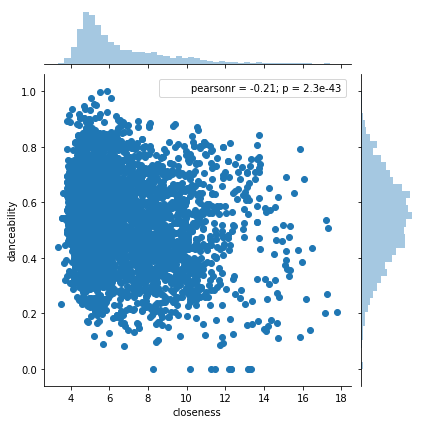

In [115]:
sns.jointplot(x=related_songs['closeness'], y=related_songs['danceability'])

In [17]:
def reduce_tempo(df):
    df['loudness'] = df['loudness'] * .5

In [18]:
reduce_tempo(related_songs)

In [22]:
list(related_songs['uri'].values)

['spotify:track:15vdIA9MH8GORELzYKOXY6',
 'spotify:track:52cyCwlHkz5ic3k3dEgwpX',
 'spotify:track:3oG20wqkXkuN4Z2XbUNYlx',
 'spotify:track:7aWteDB2WfxgAJu3uqWIUn',
 'spotify:track:3xmSH2UrjglL5aaSxj5hIh',
 'spotify:track:3Lbi3h7aOLYUtfE5y9IDIC',
 'spotify:track:6TYOCU2taNDzpADKzaPEP4',
 'spotify:track:5DKR4ui0i8jh5BQA0cWCW3',
 'spotify:track:57fJAU0sza2yIkCaydaAQz',
 'spotify:track:6zpyKdTIHTxwvJXbLb2UXV',
 'spotify:track:1KRErw2DJvrBGXHfNxEdhi',
 'spotify:track:1tS3qaZbEqKcKZRaz5eyTX',
 'spotify:track:7eU7suaZQ8Z336gyuDbYD8',
 'spotify:track:5z2LeGnH19PuaOuA2Ksmp6',
 'spotify:track:2BW8xmYgAXFOzULQRNxiNh',
 'spotify:track:2uuMsmRyRs1ey3aXRX01jP',
 'spotify:track:3VogX6fSm48tLDvvkER35q',
 'spotify:track:1Nqan7agtPHQb6aitmu4c7',
 'spotify:track:0H9P0dEUCtzAfdW1FUUvvU',
 'spotify:track:45k0ziRV2wSTDA4QRDsIRz',
 'spotify:track:6Z46sxcjkxMYD2PZZpsSWj',
 'spotify:track:0uh67hH4jHyp30dHKlGDpg',
 'spotify:track:6WIrK4XCFLtEz12Kxiyjt6',
 'spotify:track:13XiIgE6uW43RnlF3l9c0E',
 'spotify:track: